### Heart Disease Prediction : 
the data set has been taken from kaggle : `https://www.kaggle.com/ronitf/heart-disease-uci` <br/>
From the dataset we want to predict a person has a Heart disease or not

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

##### Step 1 : Data Collection
we have downloaded the data from kaggle and imported the `csv` file 

In [4]:
data = pd.read_csv('heart.csv')

In [6]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1


In [8]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#check NULL values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

we can see there are NO null values in the dataset
##### Step 2 : Data Preparation and Feature Selection :

In [12]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


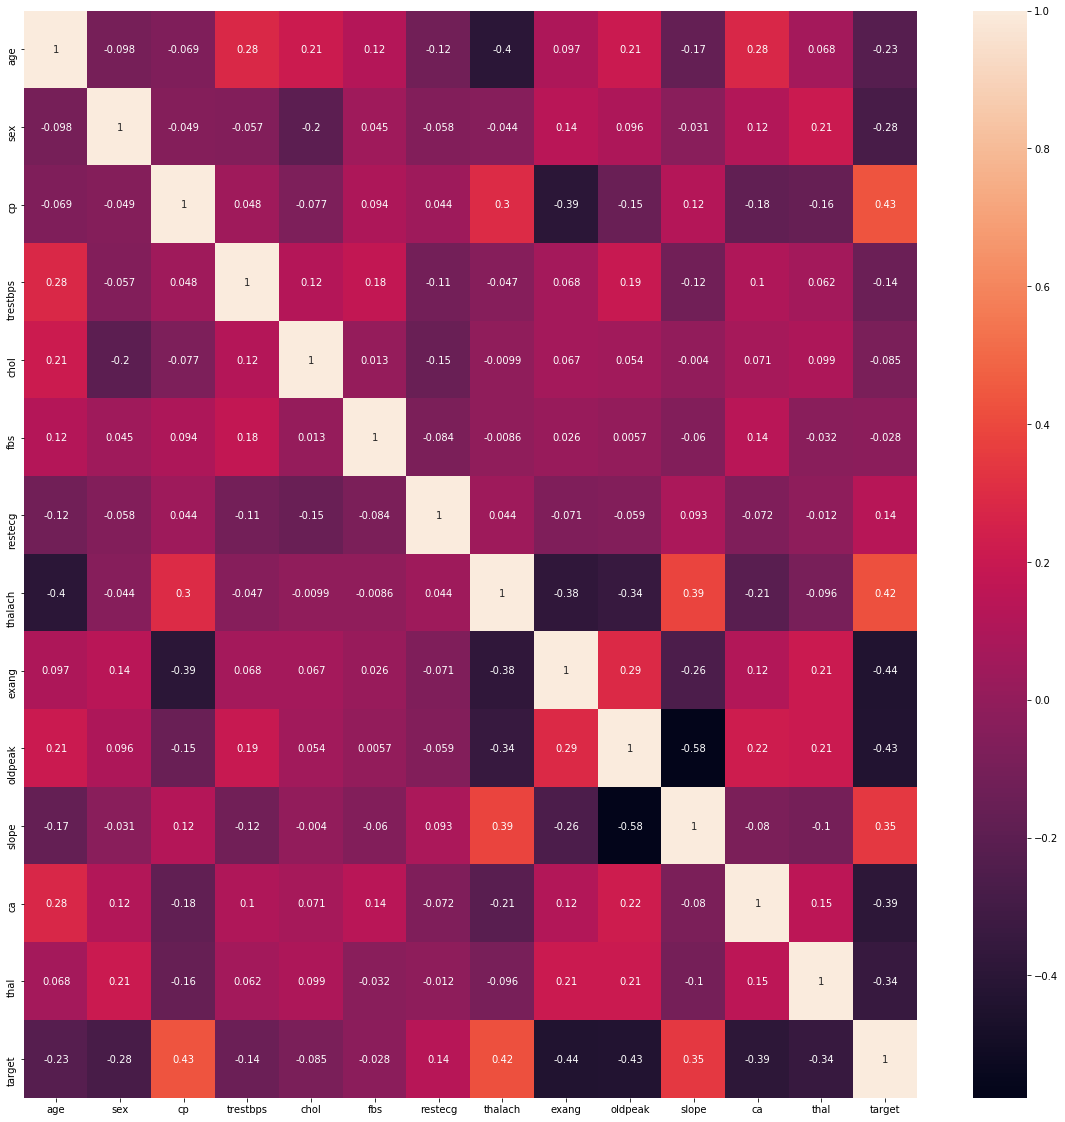

In [18]:
corr = data.corr()
corr_index = corr.index
plt.figure(figsize=(20,20))
#Plot a histogram in the graph
sns.heatmap(data[corr_index].corr() ,annot=True)

In [16]:
corr_index

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

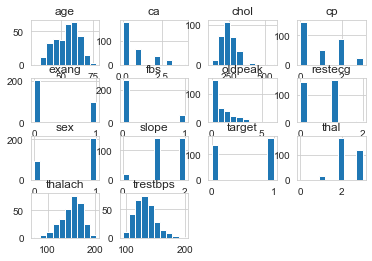

In [31]:
plt.figure(figsize=(10,10))
data.hist()
plt.show()

we can see apart from categorical data remaining all are in normal distribution

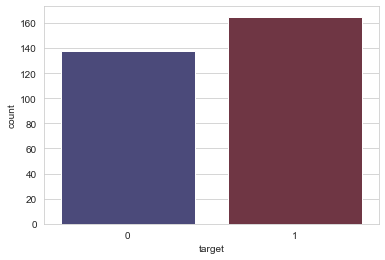

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='target' ,data= data,palette='icefire')
plt.show()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [52]:
## Convert categorical data into numaric value
dataset = pd.get_dummies(data=data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'],drop_first=True)

In [57]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [59]:
# Stadardisation of Numarica data to scale that
from sklearn.preprocessing import StandardScaler
stdc = StandardScaler()
col_need_scale =['age' , 'trestbps' , 'chol' , 'thalach' , 'oldpeak']
dataset[col_need_scale] = stdc.fit_transform(dataset[col_need_scale])


In [60]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [64]:
from sklearn.model_selection import train_test_split
#dividing into train_test_split
y = dataset.target
X = dataset.drop('target' , axis=1)

##### Step 4 : Model building :
- Knn Algorithm

In [70]:

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


knn = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier,X,y,cv=10)
    knn.append(score.mean())

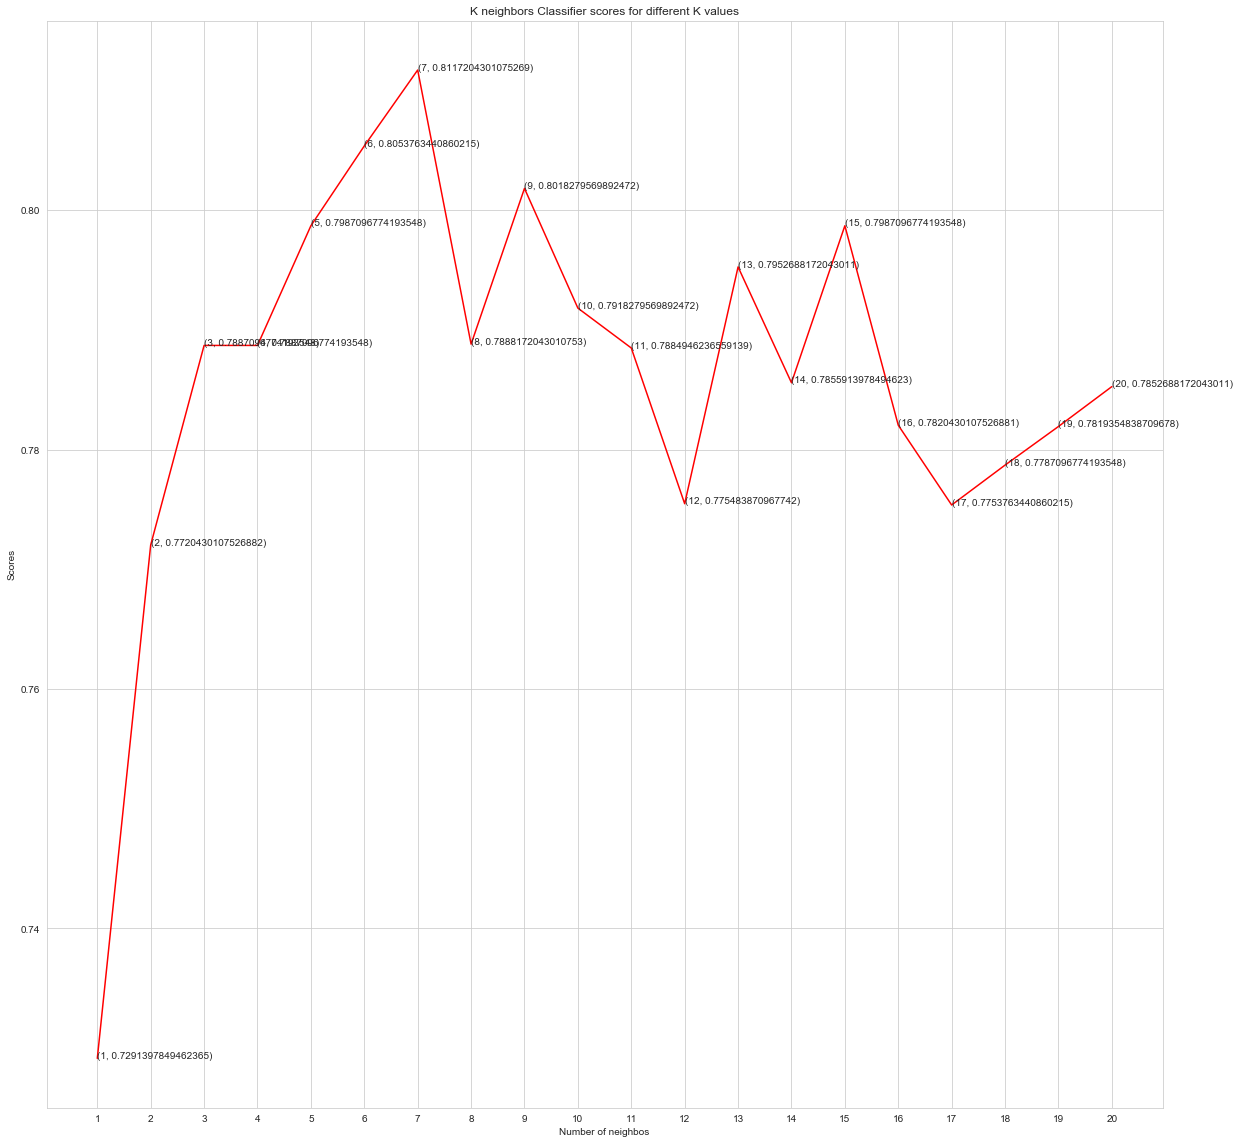

In [78]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1,21)], knn, color='red')
for i in range(1,21):
    plt.text(i,knn[i-1],(i,knn[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of neighbos')
plt.ylabel('Scores')
plt.title('K neighbors Classifier scores for different K values')
plt.show()

In [79]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
score = cross_val_score(knn_classifier,X,y,cv=10)
knn.append(score.mean())

In [81]:
score.mean()

0.8117204301075269

- Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier


In [84]:
rfc =[]
for k in range(1,21):
    rfc_classifier = RandomForestClassifier(n_estimators = k)
    score = cross_val_score(rfc_classifier,X,y,cv=10)
    rfc.append(score.mean())

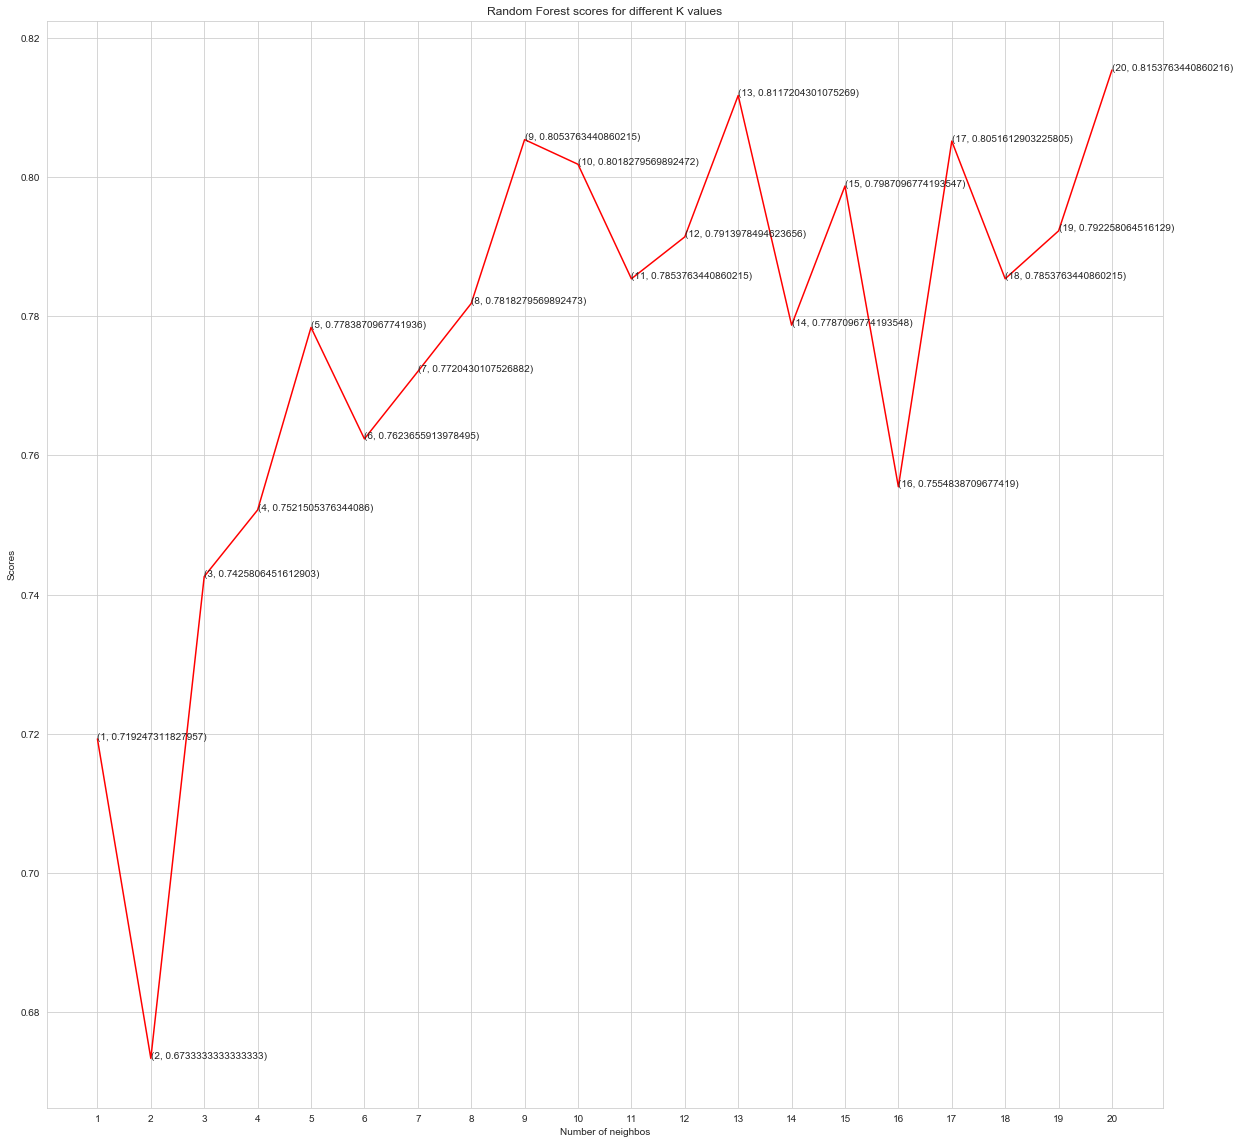

In [85]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1,21)], rfc, color='red')
for i in range(1,21):
    plt.text(i,rfc[i-1],(i,rfc[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of neighbos')
plt.ylabel('Scores')
plt.title('Random Forest scores for different K values')
plt.show()

In [90]:
rfc_classifier = RandomForestClassifier(n_estimators = 7)
score = cross_val_score(rfc_classifier,X,y,cv=10)
rfc.append(score.mean())

In [91]:
score.mean()

0.7787096774193548

In [92]:
rfc_classifier = RandomForestClassifier(n_estimators = 20)
score = cross_val_score(rfc_classifier,X,y,cv=10)
rfc.append(score.mean())

In [93]:
score.mean()

0.8050537634408602

##### Insides:
We can say Knn Algorithm gives better output than others it gives more accuracy with 7 estimators .